In [98]:
#Load Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [99]:
#pip install ucimlrepo

In [100]:
from ucimlrepo import fetch_ucirepo #from <https://archive.ics.uci.edu/dataset/320/student+performance>

**Dataset Description:**
This dataset examines student achievement in secondary education at two Portuguese schools. It includes attributes related to student grades (for a high school Portugese class), demographic, social, and school-related features, collected through school reports and questionnaires.

In the study by Cortez and Silva (2008), the datasets were modeled using binary/five-level classification and regression tasks. The study can be found here <https://repositorium.sdum.uminho.pt/bitstream/1822/8024/1/student.pdf>

**Important Note:**
The target attribute G3 (final year grade) has a strong correlation with attributes G2 (2nd period grade) and G1 (1st period grade). This is because G3 is the final year grade issued at the 3rd period, while G1 and G2 correspond to the 1st and 2nd period grades, respectively. Predicting G3 without considering G2 and G1 is more challenging but also more practical (for further details, refer to the paper).

*Source: UCI Machine Learning Repository - Student Performance Dataset*

In [101]:
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
Y = student_performance.data.targets 

In [102]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      649 non-null    int64
 1   G2      649 non-null    int64
 2   G3      649 non-null    int64
dtypes: int64(3)
memory usage: 15.3 KB


In [103]:
Y.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


| Variable Name | Role    | Type        | Demographic     | Description                                                                                                                         | Units | Missing Values |
|---------------|---------|-------------|-----------------|-------------------------------------------------------------------------------------------------------------------------------------|-------|----------------|
| school        | Feature | Categorical |                 | Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)                                                    |       | no             |
| sex           | Feature | Binary      | Sex             | Student's sex (binary: 'F' - female or 'M' - male)                                                                                   |       | no             |
| age           | Feature | Integer     | Age             | Student's age (numeric: from 15 to 22)                                                                                               |       | no             |
| address       | Feature | Categorical |                 | Student's home address type (binary: 'U' - urban or 'R' - rural)                                                                     |       | no             |
| famsize       | Feature | Categorical | Other           | Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)                                                           |       | no             |
| Pstatus       | Feature | Categorical | Other           | Parent's cohabitation status (binary: 'T' - living together or 'A' - apart)                                                          |       | no             |
| Medu          | Feature | Integer     | Education Level | Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education)  |       | no             |
| Fedu          | Feature | Integer     | Education Level | Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education)  |       | no             |
| Mjob          | Feature | Categorical | Occupation      | Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')    |       | no             |
| Fjob          | Feature | Categorical | Occupation      | Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')    |       | no             |
| reason        | Feature | Categorical |                 | Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')                         |       | no             |
| guardian      | Feature | Categorical |                 | Student's guardian (nominal: 'mother', 'father' or 'other')                                                                         |       | no             |
| traveltime    | Feature | Integer     |                 | Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)                         |       | no             |
| studytime     | Feature | Integer     |                 | Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)                                     |       | no             |
| failures      | Feature | Integer     |                 | Number of past class failures (numeric: n if 1<=n<3, else 4)                                                                        |       | no             |
| schoolsup     | Feature | Binary      |                 | Extra educational support (binary: yes or no)                                                                                       |       | no             |
| famsup        | Feature | Binary      |                 | Family educational support (binary: yes or no)                                                                                      |       | no             |
| paid          | Feature | Binary      |                 | Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)                                               |       | no             |
| activities    | Feature | Binary      |                 | Extra-curricular activities (binary: yes or no)                                                                                     |       | no             |
| nursery       | Feature | Binary      |                 | Attended nursery school (binary: yes or no)                                                                                         |       | no             |

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [105]:
# Merge features from Y into X
X = X.merge(Y[['G1', 'G2']], left_index=True, right_index=True)

In [106]:
#Drop from Y, as G3 will be our target
Y.drop(columns=['G1','G2'],inplace=True)

C:\Users\Gigaparts\AppData\Local\Temp\ipykernel_18148\2535021970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.drop(columns=['G1','G2'],inplace=True)


In [107]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13


In [108]:
# Check for missing values (placeholder, this won't be necessary)
# print("Missing values in X:\n", X.isnull().sum())
# print("Missing values in Y:\n", Y.isnull().sum())

In [109]:
# Placeholder code for imputing missing values
# imputer_X = SimpleImputer(strategy='mean')
# imputer_Y = SimpleImputer(strategy='most_frequent')  

# X_imputed = pd.DataFrame(imputer_X.fit_transform(X), columns=X.columns)
# Y_imputed = pd.DataFrame(imputer_Y.fit_transform(Y), columns=Y.columns)

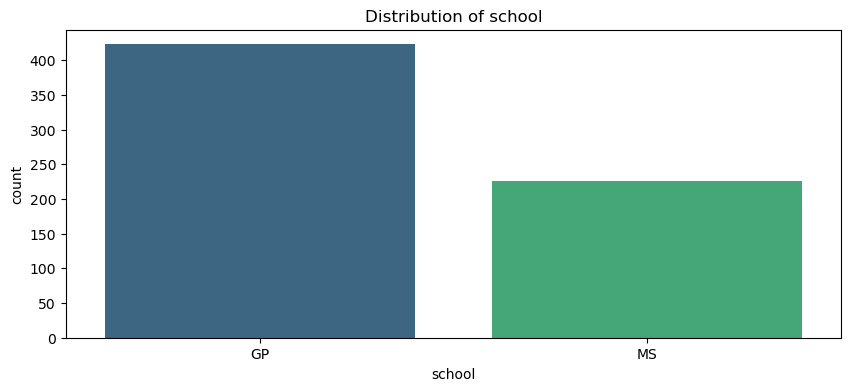

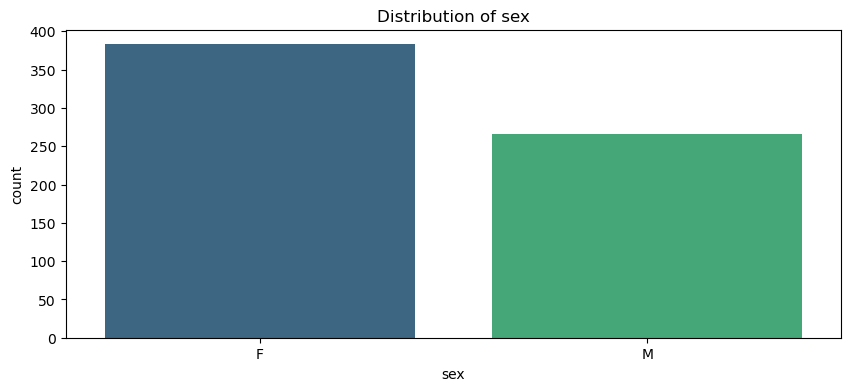

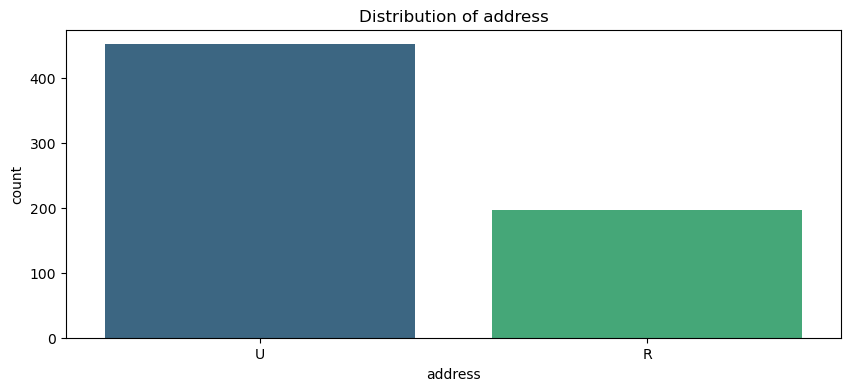

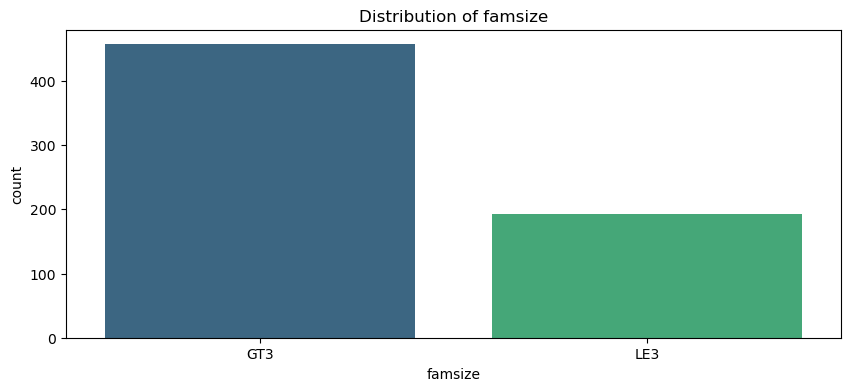

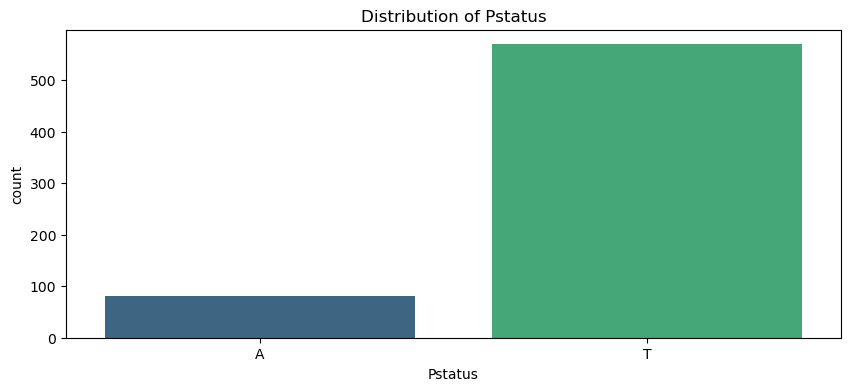

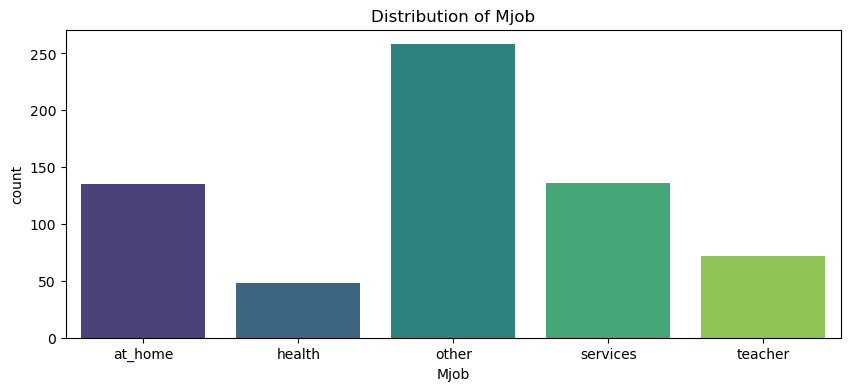

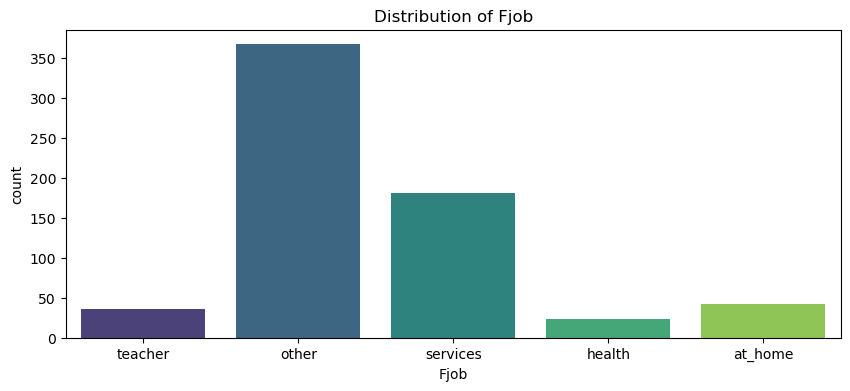

In [110]:
# Visualize the distribution of categorical variables
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob']
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=X, x=column, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.show()

C:\Users\Gigaparts\AppData\Local\Temp\ipykernel_18148\3144543141.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=X, x=column, kde=True, palette='viridis')
c:\Users\Gigaparts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


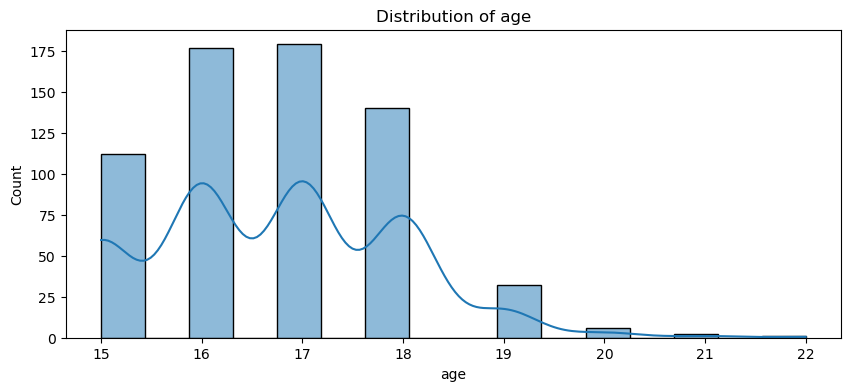

C:\Users\Gigaparts\AppData\Local\Temp\ipykernel_18148\3144543141.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=X, x=column, kde=True, palette='viridis')
c:\Users\Gigaparts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


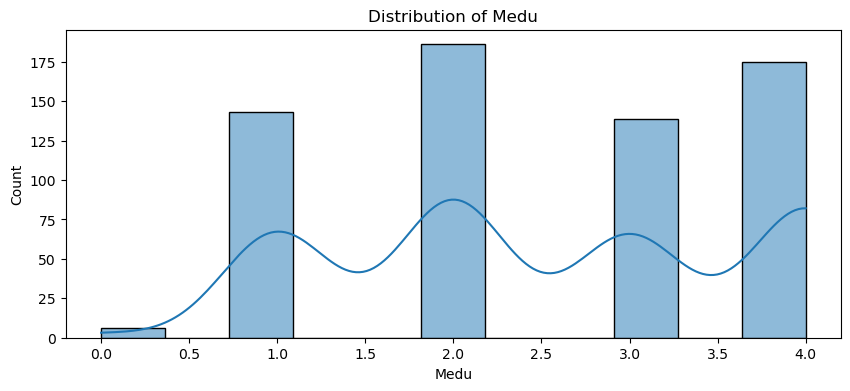

C:\Users\Gigaparts\AppData\Local\Temp\ipykernel_18148\3144543141.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=X, x=column, kde=True, palette='viridis')
c:\Users\Gigaparts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


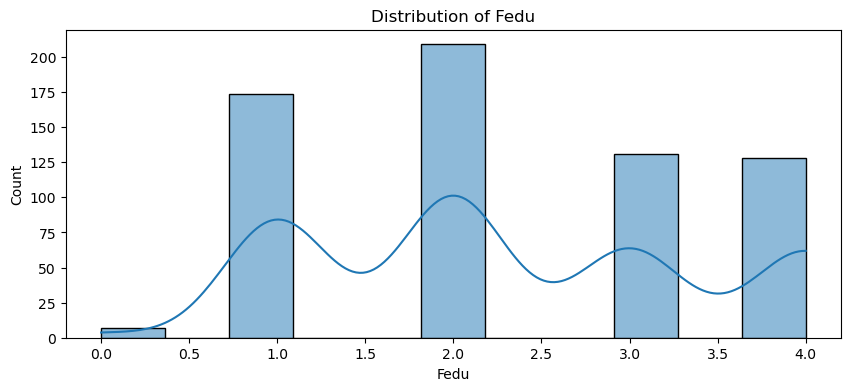

In [111]:
# Visualize the distribution of numerical variables
numerical_columns = ['age', 'Medu', 'Fedu']
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=X, x=column, kde=True, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.show()

c:\Users\Gigaparts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Gigaparts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Gigaparts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


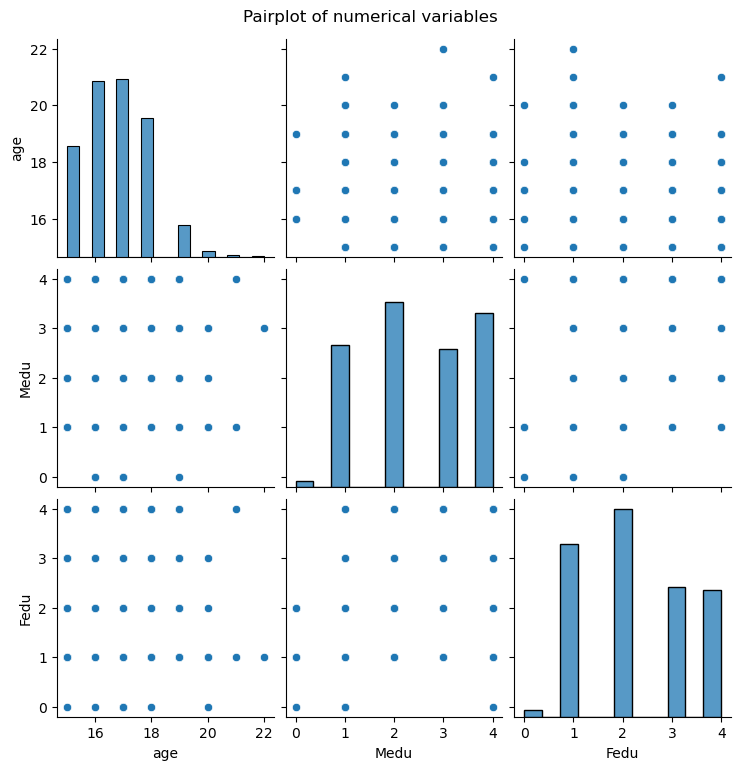

In [112]:
# Visualize the relationships between numerical variables using pairplot
sns.pairplot(X[numerical_columns])
plt.suptitle('Pairplot of numerical variables', y=1.02)
plt.show()

In [113]:
# One-Hot encoding for applicable categorical variables
oh_vars = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher','internet','romantic']
X = pd.get_dummies(X, columns=oh_vars, drop_first=True,dtype=float)

In [114]:
# Label encoding for applicable categorical variables
label_vars = ['Mjob', 'Fjob', 'reason']
label_encoder = preprocessing.LabelEncoder() 

#Loop through label_vars and apply label encoding
for var in label_vars:
    X[var] = label_encoder.fit_transform(X[var])

In [115]:
#Check features after encoding
X.head()

,age,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes
0,18,4,4,0,4,0,2,2,0,yes,no,no,4,3,4,1,1,3,4,0,11,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,17,1,1,0,2,0,1,2,0,yes,yes,no,5,3,3,1,1,3,2,9,11,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,15,1,1,0,2,2,1,2,0,yes,yes,no,4,3,2,2,3,3,6,12,13,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,15,4,2,1,3,1,1,3,0,yes,yes,yes,3,2,2,1,1,5,0,14,14,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,16,3,3,2,2,1,1,2,0,yes,no,no,4,3,2,1,2,5,0,11,13,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [116]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'yes'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# # Split the data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y_imputed, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert back to DataFrame optional
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("X_train_scaled:\n", X_train_scaled.head())
print("X_test_scaled:\n", X_test_scaled.head())
print("Y_train:\n", Y_train.head())
print("Y_test:\n", Y_test.head())